In [1]:
!pip install transformers torch pandas

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
from transformers import BartTokenizer, BartForConditionalGeneration
import pandas as pd

In [3]:
file_path = '/content/text-test100indo.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

pengenal  \
0  92c514c913c0bdfe25341af9fd72b29db544099b   
1  2003841c7dc0e7c5b1a248f9cd536d727f27a45a   
2  91b7d2311527f5c2b63a65ca98d21d9c92485149   
3  caabf9cbdf96eb1410295a673e953d304391bfbb   
4  3da746a7d9afcaa659088c8366ef6347fe6b53ea   

                                             artikel  \
0  pernahkah anda memperhatikan bagaimana kursi p...   
1  Seorang remaja laki-laki mabuk harus diselamat...   
2  dougie freedman hampir menyetujui kontrak baru...   
3  target liverpool, neto, juga diinginkan oleh p...   
4  bruce jenner akan memecah keheningannya dalam ...   

                                           highlight  
0  Para ahli mempertanyakan apakah pesawat yang p...  
1  Remaja laki-laki mabuk naik ke kandang singa d...  
2  "Nottingham Forest hampir memperpanjang kontra...  
3  Kiper Fiorentina Neto telah dikaitkan dengan L...  
4  Wawancara lengkap dengan bintang reality TV, 6...

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('pengenal').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('artikel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('highlight').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['artikel'].value_counts()
    for x_label, grp in _df_3.groupby('pengenal')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pengenal')
_ = plt.ylabel('artikel')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['highlight'].value_counts()
    for x_label, grp in _df_4.groupby('artikel')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('artikel')
_ = plt.ylabel('highlight')

In [5]:
model_name = "facebook/bart-large-cnn"

# Load tokenizer dan model dari pre-trained
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [6]:
summaries = []

# Loop melalui setiap teks dalam kolom 'artikel'
for text in df['artikel']:
    # Tokenisasi teks dan generate ringkasan
    inputs = tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)
    summary_ids = model.generate(inputs['input_ids'],
                                 max_length=150,
                                 min_length=30,
                                 length_penalty=2.0,
                                 num_beams=4,
                                 early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    summaries.append(summary)

In [7]:
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.7 MB/s eta 0:00:00


In [8]:
df['summary'] = summaries

In [9]:
from bert_score import score
# Evaluasi ringkasan menggunakan BERTScore
P, R, F1 = score(df['summary'].tolist(), df['artikel'].tolist(), lang="id", verbose=True)

# Tambahkan skor evaluasi ke dalam dataframe
df['BERTScore_P'] = P.tolist()
df['BERTScore_R'] = R.tolist()
df['BERTScore_F1'] = F1.tolist()

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

calculating scores...
computing bert embedding.


  0%|          | 0/4 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/2 [00:00<?, ?it/s]

done in 3.84 seconds, 26.02 sentences/sec


In [10]:
print(df[['summary', 'artikel', 'BERTScore_P', 'BERTScore_R', 'BERTScore_F1']])

                                              summary  \
0   pernahkah anda memperhatikan bagaimana kursi p...   
1   Rahul Kumar, 17, memanjat pagar kandang di Tam...   
2   dougie freedman hampir menyetujui kontrak baru...   
3   The reds dikaitkan dengan kepindahan pemain be...   
4    bintang olympian dan reality tv, 65 tahun, ak...   
..                                                ...   
95  Barcelona mengalahkan Paris Saint-Germain 3-1 ...   
96  Jameela Jamil memiliki senyum mempesona yang A...   
97  Christopher Bridger, 25, menyerang tiga wanita...   
98  Paris Saint-Germain akan menghadapi Nice pada ...   
99  Peluru pintar – proyektil kaliber.50 yang dile...   

                                              artikel  BERTScore_P  \
0   pernahkah anda memperhatikan bagaimana kursi p...     0.825983   
1   Seorang remaja laki-laki mabuk harus diselamat...     0.854324   
2   dougie freedman hampir menyetujui kontrak baru...     0.895280   
3   target liverpool, neto, juga di

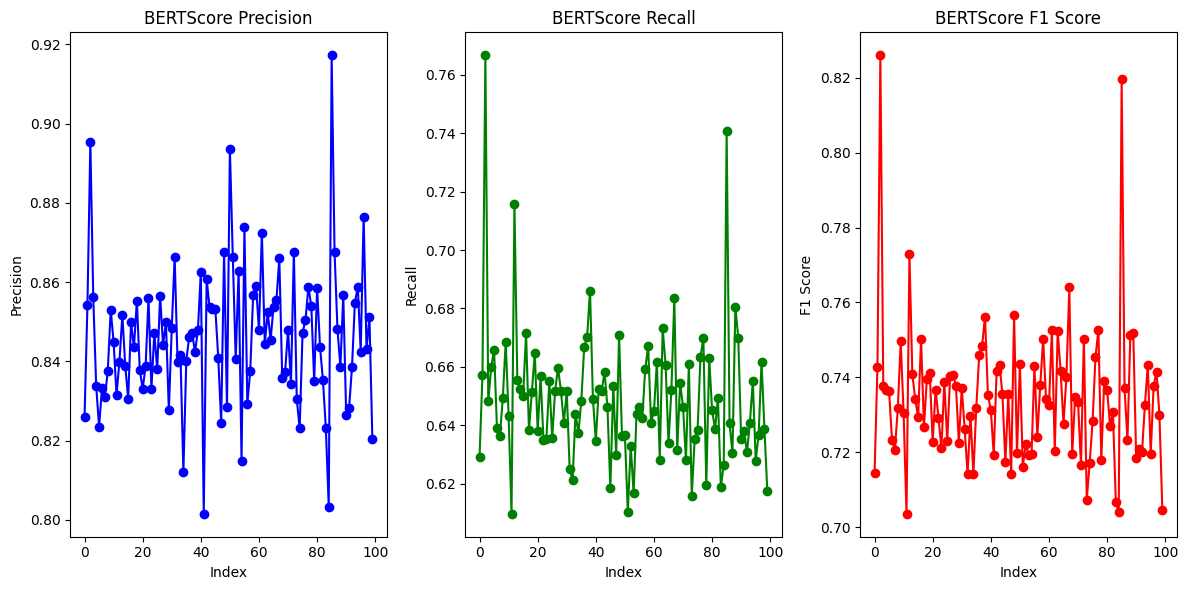

In [11]:
import matplotlib.pyplot as plt
# Membuat grafik
plt.figure(figsize=(12, 6))

# Plot Precision
plt.subplot(1, 3, 1)
plt.plot(df.index, df['BERTScore_P'], marker='o', linestyle='-', color='b')
plt.title('BERTScore Precision')
plt.xlabel('Index')
plt.ylabel('Precision')

# Plot Recall
plt.subplot(1, 3, 2)
plt.plot(df.index, df['BERTScore_R'], marker='o', linestyle='-', color='g')
plt.title('BERTScore Recall')
plt.xlabel('Index')
plt.ylabel('Recall')

# Plot F1 Score
plt.subplot(1, 3, 3)
plt.plot(df.index, df['BERTScore_F1'], marker='o', linestyle='-', color='r')
plt.title('BERTScore F1 Score')
plt.xlabel('Index')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

In [25]:
new_sentences = [
    "Teknologi AI semakin berkembang pesat setiap tahunnya.",
    "Pemerintah telah mengeluarkan kebijakan baru terkait pendidikan.",
    "Penggunaan energi terbarukan meningkat di berbagai negara.",
    "Penelitian terbaru menunjukkan manfaat kesehatan dari olahraga rutin.",
    "Perubahan iklim menjadi tantangan besar bagi generasi mendatang.",
    "Ekonomi global mengalami pemulihan setelah pandemi.",
    "Startup teknologi terus berinovasi untuk memenuhi kebutuhan pasar.",
    "Pendidikan online menjadi alternatif selama pandemi COVID-19.",
    "Industri pariwisata mulai bangkit kembali setelah penurunan tajam.",
    "Kesadaran akan pentingnya kesehatan mental semakin meningkat."
]

# Generate summaries for the new sentences
new_summaries = []
for text in new_sentences:
    inputs = tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=150, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    new_summaries.append(summary)

# Evaluate the new summaries using BERTScore
new_P, new_R, new_F1 = score(new_summaries, new_sentences, lang="id", verbose=True)

# Display the new sentences, their summaries, and BERTScore evaluations
for i, (sentence, summary, p, r, f1) in enumerate(zip(new_sentences, new_summaries, new_P, new_R, new_F1)):
    print(f"Sentence {i+1}: {sentence}")
    print(f"Summary {i+1}: {summary}")
    print(f"BERTScore Precision: {p:.4f}, Recall: {r:.4f}, F1: {f1:.4f}\n")

calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.06 seconds, 174.28 sentences/sec
Sentence 1: Teknologi AI semakin berkembang pesat setiap tahunnya.
Summary 1: Teknologi AI semakin berkembang pesat setiap tahunnya. Tumumnya, ini, ia semakin bersiarkan ikonologi yang bersikar, ianjakan, ikonomi, karakter, iala, ilih.
BERTScore Precision: 0.7054, Recall: 0.9479, F1: 0.8088

Sentence 2: Pemerintah telah mengeluarkan kebijakan baru terkait pendidikan.
Summary 2: Pemerintah telah mengeluarkan kebijakan baru terkait pendidikan. Pemerintahan telah ikonologi, ialakan, ianakan dan ialahkan, dan bersamaan.
BERTScore Precision: 0.7167, Recall: 0.9440, F1: 0.8148

Sentence 3: Penggunaan energi terbarukan meningkat di berbagai negara.
Summary 3: Penggunaan energi terbarukan meningkat di berbagai negara. Meningkat berbagati negara iala, ianakan, ialakan ialai ialah, ia meningkapkan.
BERTScore Precision: 0.7158, Recall: 0.9537, F1: 0.8178

Sentence 4: Penelitian terbaru menunjukkan manfaat kesehatan dari olahraga rutin.
Summary 4: Penelit